In [284]:
import pandas as pd
import numpy as np
import datetime
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [101]:
bitcoin17['datetime'] = pd.to_datetime(bitcoin17['timestamp'], unit='s')
bitcoin17.set_index('datetime', inplace = True)
btc17open = bitcoin17.Open


In [114]:
btc17open.sort_index(inplace = True)
btc17open.head(250)

datetime
2017-08-17 00:00:00    4261.48
2017-08-17 00:01:00    4261.48
2017-08-17 00:02:00    4261.48
2017-08-17 00:03:00    4261.48
2017-08-17 00:04:00    4261.48
                        ...   
2017-08-17 04:05:00    4261.48
2017-08-17 04:06:00    4261.48
2017-08-17 04:07:00    4261.48
2017-08-17 04:08:00    4261.48
2017-08-17 04:09:00    4261.48
Name: Open, Length: 250, dtype: float64

In [108]:
btc17open.resample('1D').first()

datetime
2017-08-17     4261.48
2017-08-18     4285.08
2017-08-19     4108.37
2017-08-20     4139.98
2017-08-21     4069.13
                ...   
2017-12-27    15709.98
2017-12-28    15459.97
2017-12-29    14199.14
2017-12-30    14378.99
2017-12-31    12345.10
Freq: D, Name: Open, Length: 137, dtype: float64

In [207]:
def get_data(coin = 'bitcoin', year = 2017):
    
    df = pd.read_csv(f'./data/{coin}_{year}.csv')
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit = 's')
    df.set_index('timestamp', inplace = True)
    df.sort_index(inplace = True)
    df = df[['Count','Open','High','Low','Close','Volume','VWAP','Target']]
    
    return df

In [215]:
btc2017 = get_data()
btc2018 = get_data('bitcoin', 2018)
btc2019 = get_data('bitcoin', 2019)
btc2020 = get_data('bitcoin', 2020)
btc2021 = get_data('bitcoin', 2021)

In [219]:
btc = pd.concat([btc2017, btc2018, btc2019, btc2020, btc2021], axis = 0)

In [280]:
def simple_moving_average(df, windows = 7, time_period = '1D'):
    if (windows == 7) & (time_period == '1D'):
        df = df.resample(time_period).first()
        df['sma7'] = df['Open'].rolling(windows, min_periods = int(windows*.75)).mean()
        df['sma50'] = df['Open'].rolling(50, min_periods = int(50*.75)).mean()  
        df['sma200'] = df['Open'].rolling(200, min_periods = int(200*.75)).mean().dropna()
        
        maplot = df[['Open', 'sma7', 'sma50', 'sma200']]
        maplot.plot(figsize = (24,10), subplots = False, legend = True)
        
    else:
        df = df.resample(time_period).first()
        df['sma'] = df['Open'].rolling(windows, min_periods = int(windows*.75)).mean()
        
        maplot = df[['Open', 'sma']]
        maplot.plot(figsize = (24,10), subplots = False, legend = True)
        
    return df

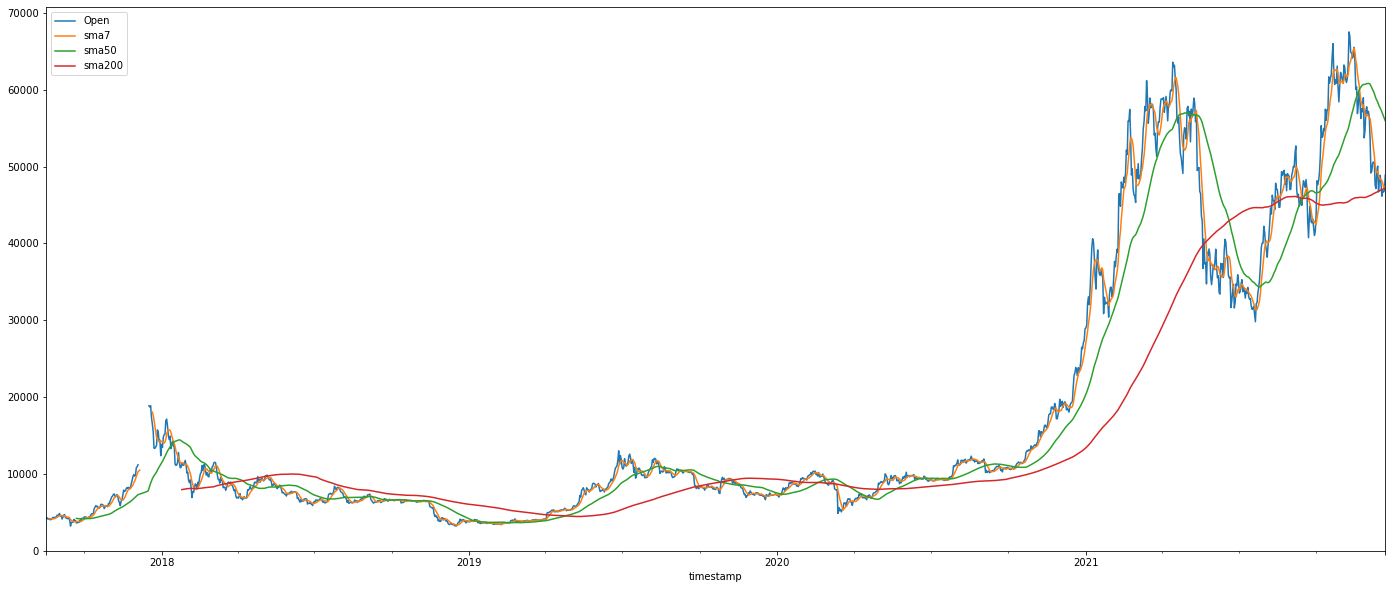

In [287]:
btcsma = simple_moving_average(btc)

,Count,Open,High,Low,Close,Volume,VWAP,Target,sma
timestamp,,,,,,,,,
2017-08-17 00:00:00,3.0,4261.48,4261.48,4261.48,4261.48,1.775183,9943.453333,0.000000e+00,NaN
2017-08-17 12:00:00,0.0,4427.30,4427.30,4427.30,4427.30,0.000000,10350.806667,1.309721e-03,NaN
2017-08-18 00:00:00,1.0,4285.08,4285.08,4285.08,4285.08,0.022196,9998.520000,3.983590e-03,NaN
2017-08-18 12:00:00,0.0,4340.31,4340.31,4340.31,4340.31,0.000000,10107.600000,-3.479014e-04,NaN
2017-08-19 00:00:00,5.0,4108.37,4108.37,4108.37,4108.37,0.711854,9586.196667,2.425459e-03,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-20 12:00:00,569.0,46092.60,46092.60,46063.53,46080.03,19.436840,107516.140000,-2.081668e-17,48010.352083
2021-12-21 00:00:00,1206.0,46914.17,46996.00,46914.16,46951.97,55.501860,109560.816667,4.878910e-18,47862.142917
2021-12-21 12:00:00,789.0,48866.92,48876.24,48826.49,48853.17,25.895480,113987.120000,4.987330e-18,47849.908750


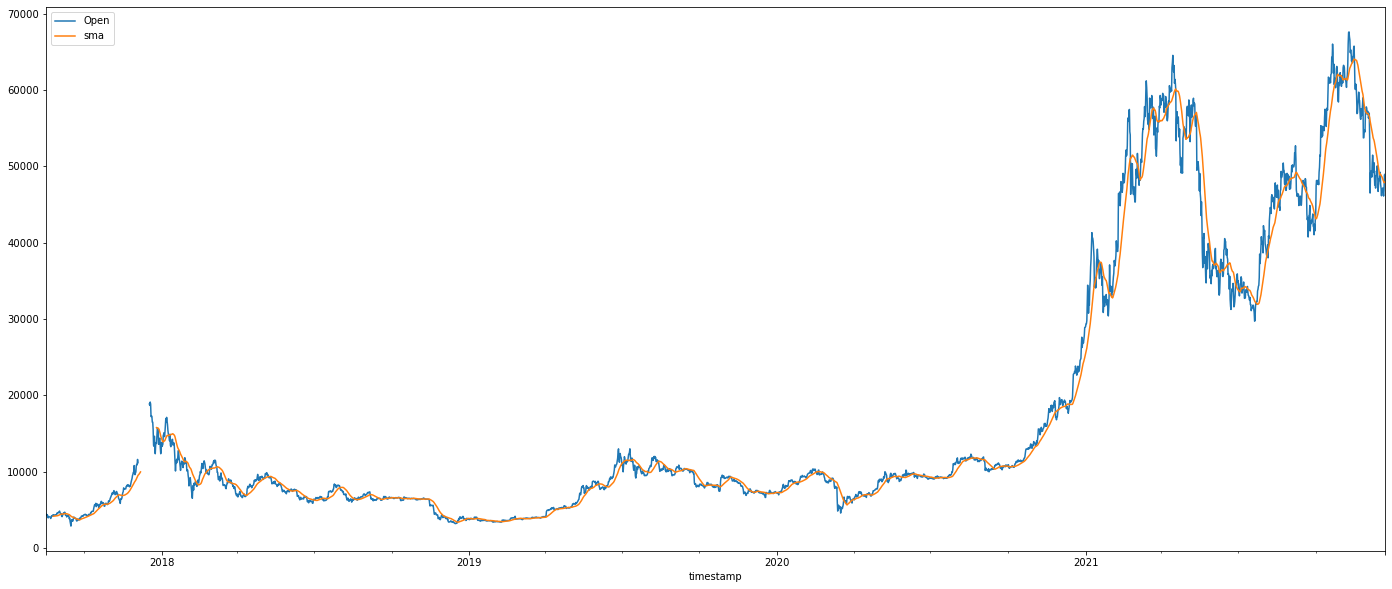

In [286]:
btc12h = simple_moving_average(btc, windows = 24, time_period = '12H')
btc12h
# Golden Cross vs. Death Cross

In [ ]:
def stationary(df):
    